In [ ]:
# logistic regression lab

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


We are taking a synthethic dataset for the classification problem using the logistic regression, the dataset consists of x feature and corresponding y feature of GRE students. Where the label corresponds with 0 and 1 which helps to predict either the student is admitted or not.

We use the synthetic classification dataset to create our own dataset with 20 samples.

In [ ]:
from sklearn.datasets import make_classification

def generate_dataset():
  dataset = make_classification(n_samples=20, n_features=1, n_repeated=0, n_redundant=0,  shift=30,
                                scale=10, n_classes=2, n_clusters_per_class=1, n_informative=1,
                                class_sep=1, random_state=1)
  df = pd.DataFrame(dataset[0])
  df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
  df.columns = ['GRE_Score', 'Admission']
  return df

In [ ]:
df = generate_dataset()
df.head(20)

,GRE_Score,Admission
0,310,1
1,297,0
2,318,1
3,290,0
4,288,0
5,294,0
6,312,1
7,282,0
8,315,1
9,311,1


Based on the dataset generated above, the task here is to predict if a student gets admission or not given their GRE Score. Even though this is a classification problem with  y  taking on discrete values (1 and 0), we will first approach this problem using linear regression and discuss if it can predict  y  given  x .

Before moving further, let's plot and see how the data looks.

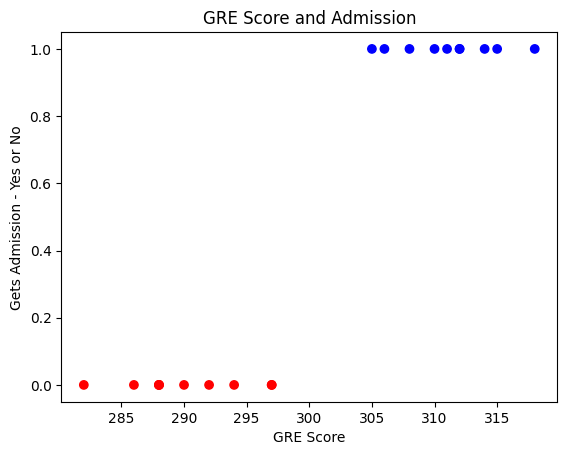

In [ ]:
map_color = np.array(['r', 'b'])

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

plt.scatter(df.GRE_Score, df.Admission, c = map_color[y])

plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')
plt.show()


Here we can see that because we have a binary value the scatter plot is quite understandable, and fitting the linear regression model will not give a proper prediction , but let us fit the linear regression   

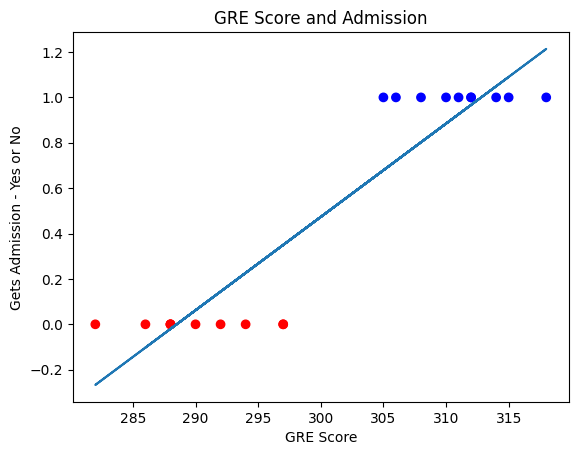

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegressor = LinearRegression()
linearRegressor.fit(x, y)

plt.scatter(x, y, c=map_color[y])
plt.plot(x, linearRegressor.predict(x))
plt.title('GRE Score and Admission')
plt.xlabel('GRE Score')
plt.ylabel('Gets Admission - Yes or No')

plt.show()

Now in logistic regression we will pass the output of the linear regression to a function known as sigmoid function.  

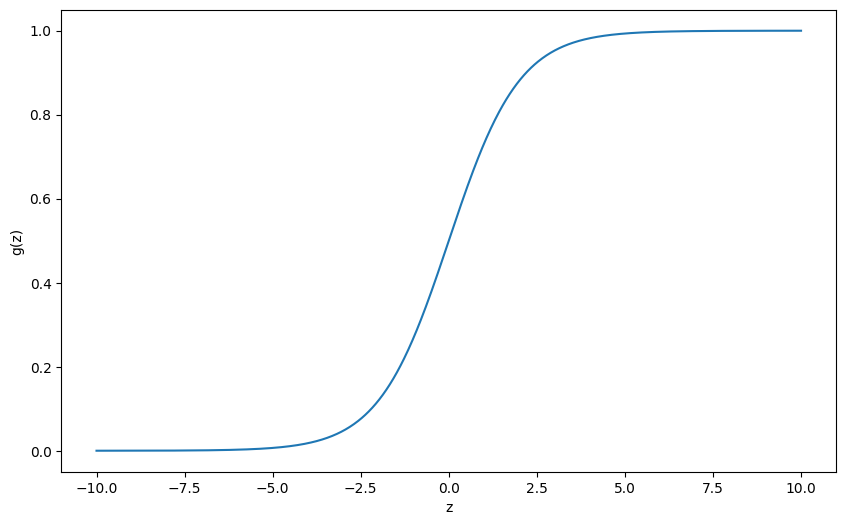

In [ ]:
z = np.linspace(-10, 10, 1000) # An array of 1000 elements

# Created a Sigmoid function
def sigma(z):
  return 1/(1 + np.exp(-z))

plt.figure(figsize=(10,6))
plt.plot(z, sigma(z))
plt.xlabel("z")
plt.ylabel("g(z)")

plt.show()

Now we have to fit the logistic regression model to our data.

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x,y)

LogisticRegression()

In [ ]:
class_label_Person1 = logistic_regression.predict([[304]])
print("The predicted class label for Person1 is:", class_label_Person1)

class_label_Person2= logistic_regression.predict([[299]])
print("The predicted class label for Person2 is:", class_label_Person2)

The predicted class label for Person1 is: [1]
The predicted class label for Person2 is: [0]


Now we use another dataset.


In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
X = df.drop('churn',axis=1)
y = df['churn']

In [ ]:
# normalizing our dataset

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

We split our dataset into train and test set:


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4 )

In [ ]:
print('Train Set:' , X_train.shape,y_train.shape)
print('Test Set:' , X_test.shape,y_test.shape)

Train Set: (160, 27) (160,)
Test Set: (40, 27) (40,)


In [ ]:
# modeling the logistic regression with sklearn.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')